# FinTech Reviews - Exploratory Data Analysis (Preprocessing)

This notebook performs exploratory data analysis on the raw FinTech app reviews before any preprocessing is applied.

In [5]:
# Import required libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import plotly.express as px
from datetime import datetime

# Set up display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)
plt.style.use('ggplot')
%matplotlib inline

# Add parent directory to path to import local modules
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

In [6]:
# Load the raw data
data_path = os.path.join('..', 'data', 'raw', 'reviews.csv')
df = pd.read_csv(data_path)

# Display basic info
print(f"Total reviews: {len(df)}")
print("\nFirst 5 rows:")
display(df.head())
print("\nData types and missing values:")
display(df.info())
print("\nBasic statistics:")
display(df.describe(include='all'))

Total reviews: 1200

First 5 rows:


,review,rating,date,bank,source
0,"""Why don’t your ATMs support account-to-account transfers like other countries( Kenya, Nigeria , South africa)""",4,2025-06-05,Commercial Bank of Ethiopia,Google Play
1,what is this app problem???,1,2025-06-05,Commercial Bank of Ethiopia,Google Play
2,the app is proactive and a good connections.,5,2025-06-05,Commercial Bank of Ethiopia,Google Play
3,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play
4,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1200 non-null   object
 1   rating  1200 non-null   int64 
 2   date    1200 non-null   object
 3   bank    1200 non-null   object
 4   source  1200 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.0+ KB


None


Basic statistics:


,review,rating,date,bank,source
count,1200,1200.000000,1200,1200,1200
unique,986,NaN,270,3,1
top,good,NaN,2025-04-21,Commercial Bank of Ethiopia,Google Play
freq,51,NaN,123,400,1200
mean,NaN,3.909167,NaN,NaN,NaN
std,NaN,1.630889,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN
25%,NaN,3.000000,NaN,NaN,NaN
50%,NaN,5.000000,NaN,NaN,NaN
75%,NaN,5.000000,NaN,NaN,NaN


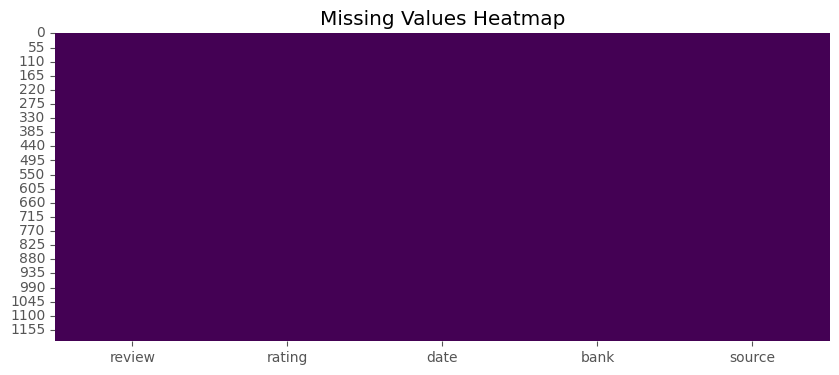

In [7]:
# Check for missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

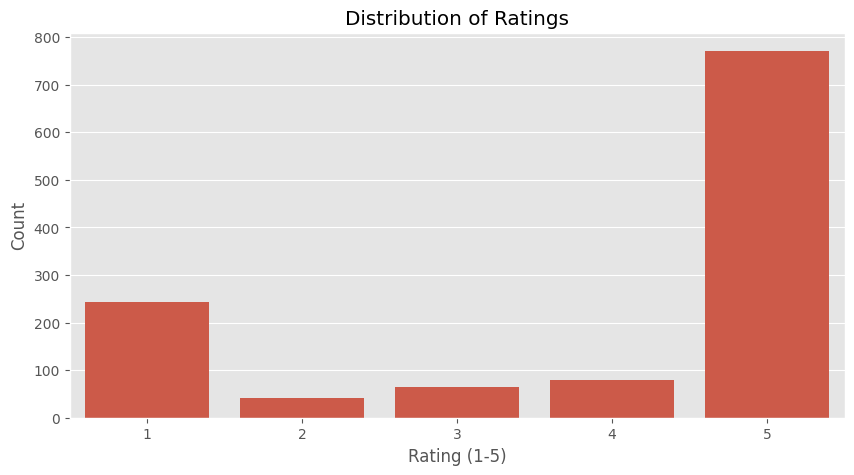

In [8]:
# Distribution of ratings
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating (1-5)')
plt.ylabel('Count')
plt.show()

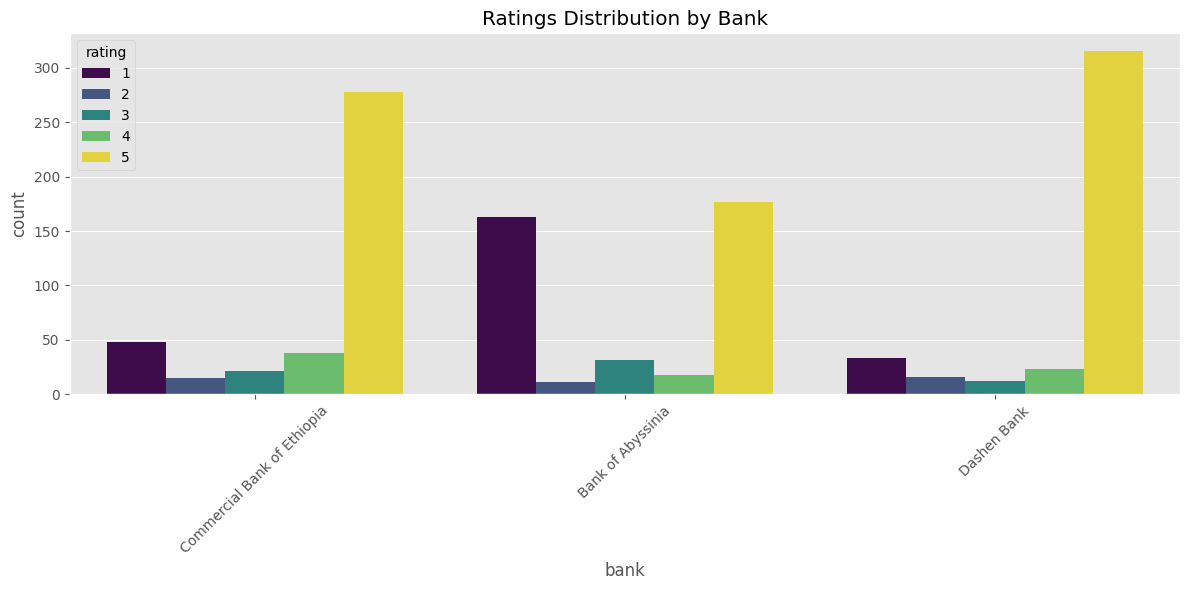

In [9]:
# Ratings distribution by bank
plt.figure(figsize=(12, 6))
sns.countplot(x='bank', hue='rating', data=df, palette='viridis')
plt.title('Ratings Distribution by Bank')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

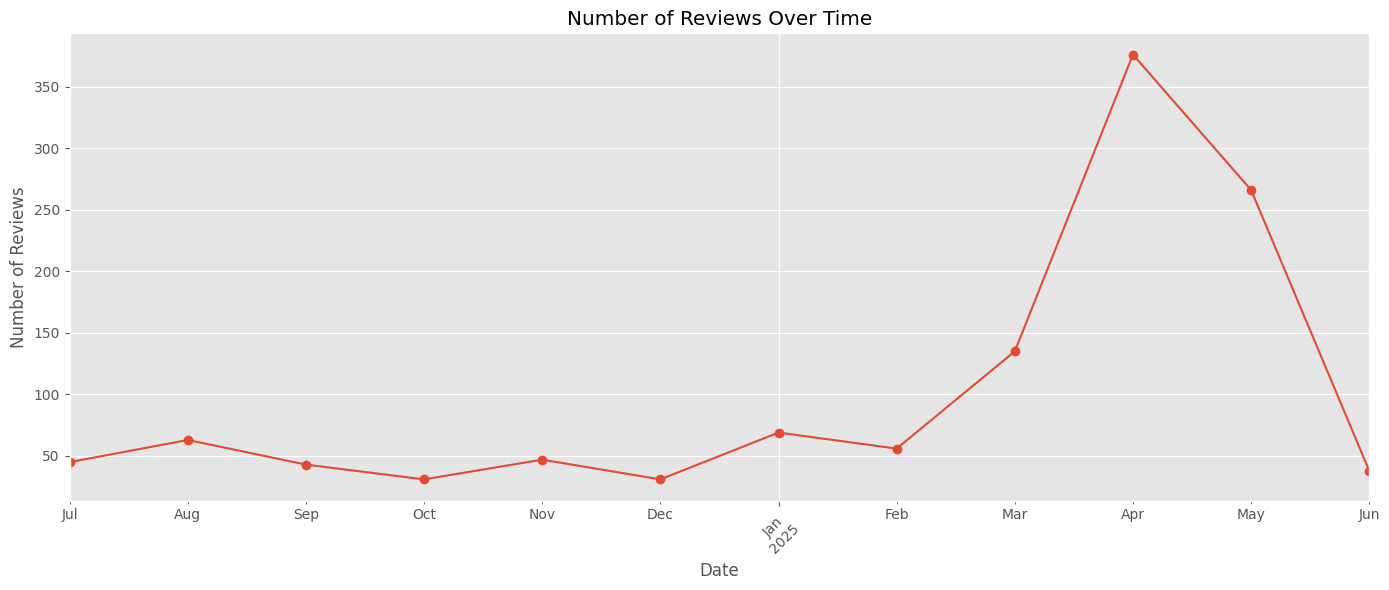

In [10]:
# Convert date to datetime and analyze trends
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month_year'] = df['date'].dt.to_period('M')

# Plot reviews over time
plt.figure(figsize=(14, 6))
df.groupby('month_year').size().plot(kind='line', marker='o')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

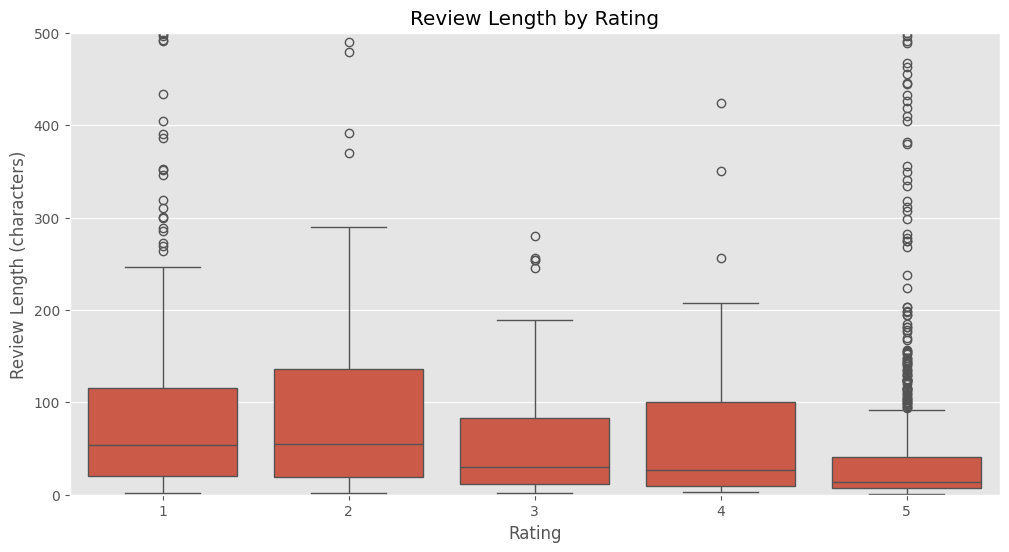

In [11]:
# Analyze review length
df['review_length'] = df['review'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='review_length', data=df)
plt.ylim(0, 500)  # Limit y-axis for better visualization
plt.title('Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (characters)')
plt.show()

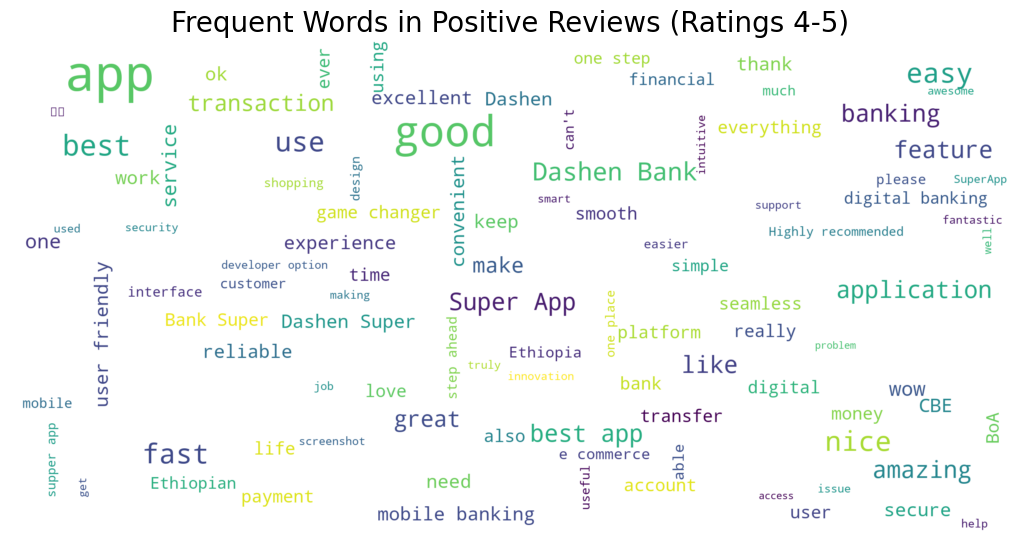

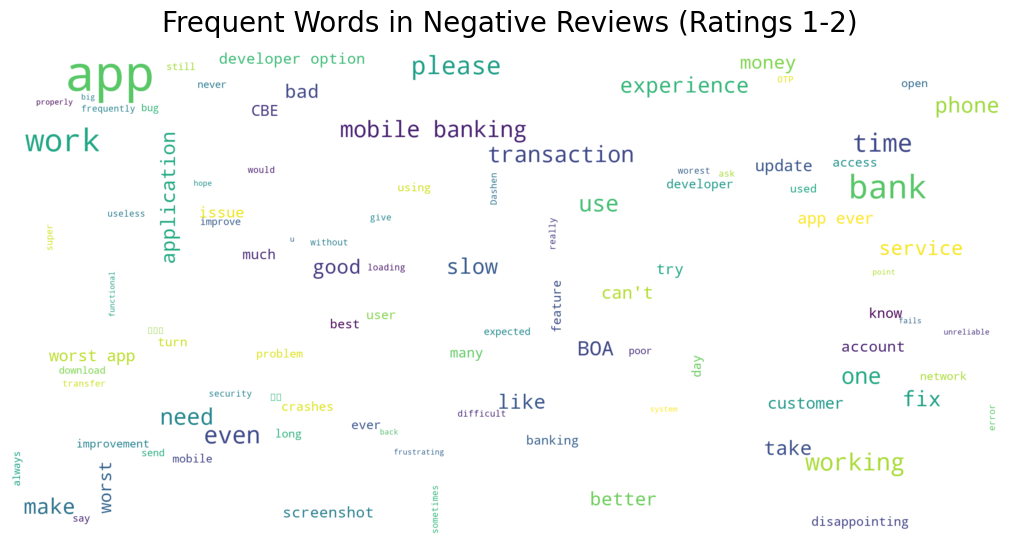

In [17]:
# Word cloud for positive reviews (ratings 4-5)
positive_reviews = ' '.join(df[df['rating'] >= 4]['review'].dropna())
negative_reviews = ' '.join(df[df['rating'] <= 2]['review'].dropna())

# # Download stopwords if not already downloaded
# nltk.download('stopwords')
# nltk.download('punkt')

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         stopwords=set(stopwords.words('english')),
                         max_words=100,
                         max_font_size=40,
                         scale=3,
                         random_state=42).generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.tight_layout(pad=0)
    plt.show()

# Generate word clouds
generate_wordcloud(positive_reviews, 'Frequent Words in Positive Reviews (Ratings 4-5)')
generate_wordcloud(negative_reviews, 'Frequent Words in Negative Reviews (Ratings 1-2)')

In [14]:
# Check for duplicate reviews
duplicate_rows = df[df.duplicated(subset=['review', 'bank'], keep=False)]
print(f"Number of duplicate reviews (same text and bank): {len(duplicate_rows)}")
if not duplicate_rows.empty:
    print("\nSample duplicate reviews:")
    display(duplicate_rows.head())

Number of duplicate reviews (same text and bank): 225

Sample duplicate reviews:


,review,rating,date,bank,source,month_year,review_length
4,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play,2025-06,4
8,best,5,2025-06-04,Commercial Bank of Ethiopia,Google Play,2025-06,4
11,good,5,2025-06-04,Commercial Bank of Ethiopia,Google Play,2025-06,4
13,good,5,2025-06-04,Commercial Bank of Ethiopia,Google Play,2025-06,4
14,Good,5,2025-06-04,Commercial Bank of Ethiopia,Google Play,2025-06,4


In [15]:
# Save EDA results
eda_results = {
    'total_reviews': len(df),
    'unique_banks': df['bank'].nunique(),
    'date_range': (df['date'].min(), df['date'].max()),
    'missing_values': df.isnull().sum().to_dict(),
    'rating_distribution': df['rating'].value_counts().to_dict()
}

print("\nEDA Summary:")
for key, value in eda_results.items():
    print(f"{key}: {value}")


EDA Summary:
total_reviews: 1200
unique_banks: 3
date_range: (Timestamp('2024-07-16 00:00:00'), Timestamp('2025-06-05 00:00:00'))
missing_values: {'review': 0, 'rating': 0, 'date': 0, 'bank': 0, 'source': 0, 'month_year': 0, 'review_length': 0}
rating_distribution: {5: 771, 1: 244, 4: 79, 3: 64, 2: 42}
